In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [221]:
basedir = '../results/2021Nov17_202731'
hostnames = ['atkr'] + [f'h{i}' for i in range(8)]
test_time = 10
atkr_para_conns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
transport_algos = ['TCPreno','TCPcubic']
iperf_header = ['timestamp','src_addr','src_port','dest_addr','dest_port','transferID','interval','transferred_bytes','bits_per_second']

In [222]:
dfall = []
for host in hostnames:
    for atkr_para_conn in atkr_para_conns:
        for tpt_algo in transport_algos:
            dfi = pd.read_csv(f'{basedir}/{tpt_algo}/{atkr_para_conn}conn/iperf_{host}.csv', names=iperf_header)
            dfi['host'] = host
            dfi['transport'] = tpt_algo
            dfi['atkr_para_conn'] = atkr_para_conn
            dfall.append(dfi)

dfbigboi = pd.concat(dfall)
dfbigboi

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,transport,atkr_para_conn
0,20211117202735,10.0.0.1,55128,10.0.0.10,5001,3,0.0-1.0,30939416,247515328,atkr,TCPreno,1
1,20211117202736,10.0.0.1,55128,10.0.0.10,5001,3,1.0-2.0,130320,1042560,atkr,TCPreno,1
2,20211117202737,10.0.0.1,55128,10.0.0.10,5001,3,2.0-3.0,195480,1563840,atkr,TCPreno,1
3,20211117202738,10.0.0.1,55128,10.0.0.10,5001,3,3.0-4.0,130320,1042560,atkr,TCPreno,1
4,20211117202739,10.0.0.1,55128,10.0.0.10,5001,3,4.0-5.0,195480,1563840,atkr,TCPreno,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6,20211117203207,10.0.0.9,40114,10.0.0.10,5001,3,6.0-7.0,98304,786432,h7,TCPcubic,10
7,20211117203208,10.0.0.9,40114,10.0.0.10,5001,3,7.0-8.0,761440,6091520,h7,TCPcubic,10
8,20211117203209,10.0.0.9,40114,10.0.0.10,5001,3,8.0-9.0,222992,1783936,h7,TCPcubic,10
9,20211117203210,10.0.0.9,40114,10.0.0.10,5001,3,9.0-10.0,227984,1823872,h7,TCPcubic,10


In [223]:
dfbigboi['interval'].unique()

array(['0.0-1.0', '1.0-2.0', '2.0-3.0', '3.0-4.0', '4.0-5.0', '5.0-6.0',
       '6.0-7.0', '7.0-8.0', '8.0-9.0', '9.0-10.0', '0.0-10.3',
       '0.0-10.1', '0.0-10.4', '0.0-10.0', '0.0-10.2', '0.0-10.5',
       '0.0-10.6'], dtype=object)

missing data points = 80


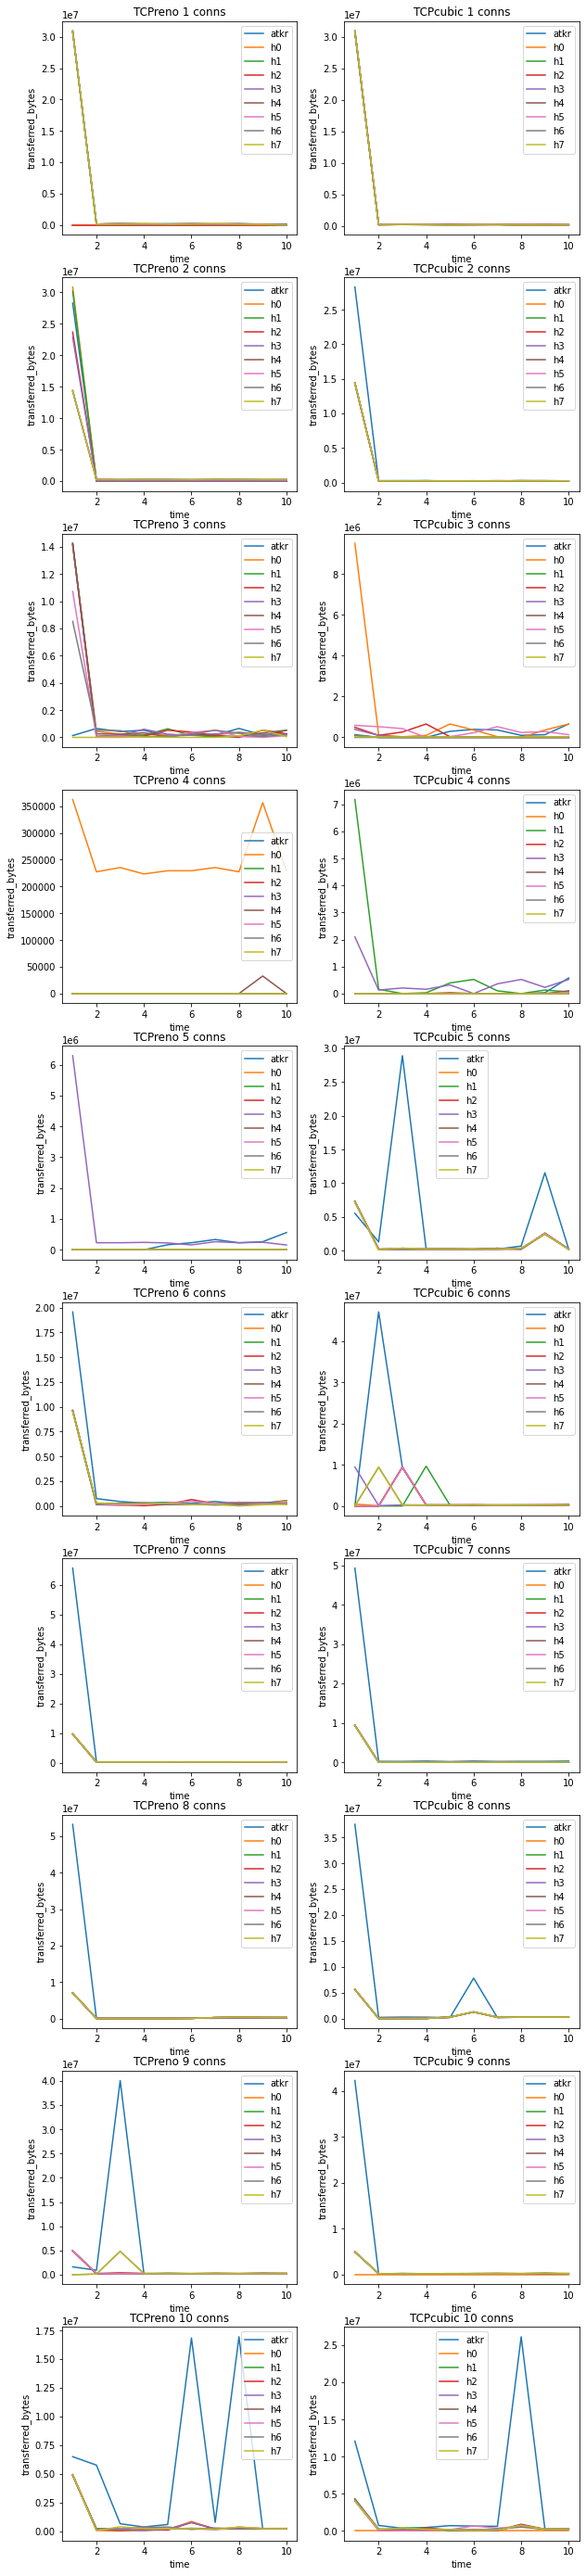

In [224]:
fig, axs = plt.subplots(len(atkr_para_conns), len(transport_algos), figsize=(10, 5*10))
missing_data = 0
for apc in atkr_para_conns:
    df0 = dfbigboi[dfbigboi['atkr_para_conn'] == apc]
    for tpt_algo in transport_algos:
        df1 = df0[df0['transport'] == tpt_algo]
        axi = axs[atkr_para_conns.index(apc)][transport_algos.index(tpt_algo)]
        axi.set_title(f'{tpt_algo} {apc} conns')
        for host in hostnames:
            df2 = df1[df1['host'] == host]
            t_axis = []
            bytes_tx = []
            for t in range(test_time):
                tint = f'{t:.1f}-{t+1:.1f}'
                df3 = df2[df2['interval'] == tint]
                if df3.shape[0] > 1:
                    df3 = df3[df3['transferID'] == -1]
                t_axis.append(t+1)
                try:
                    bytes_tx.append(df3['transferred_bytes'].values[0])
                except:
                    bytes_tx.append(-1)
                    missing_data += 1
                # if bytes_tx[-1] <= 0:
                #     bytes_tx[-1] = 1
            axi.plot(t_axis, bytes_tx, label=host)
        axi.legend()
        axi.set_xlabel('time')
        axi.set_ylabel('transferred_bytes')

print(f'missing data points = {missing_data}')

missing data points = 5
missing data points = 3


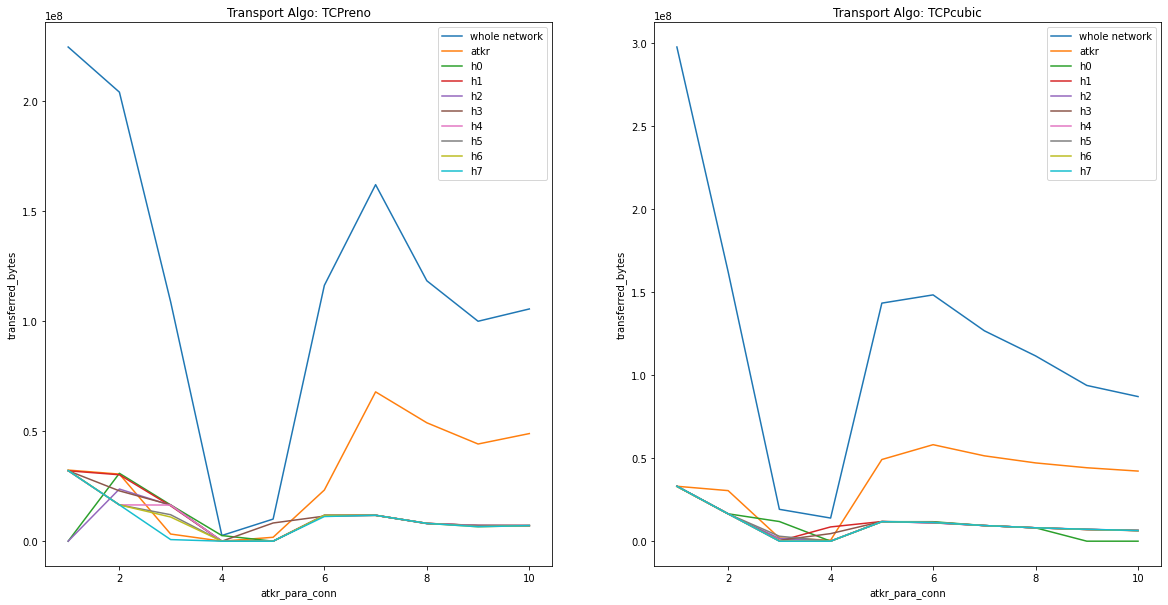

In [225]:
dfall = []
for host in hostnames:
    for atkr_para_conn in atkr_para_conns:
        for tpt_algo in transport_algos:
            dfi = pd.read_csv(f'{basedir}/{tpt_algo}/{atkr_para_conn}conn/iperf_{host}.csv', names=iperf_header)
            dfi['host'] = host
            dfi['transport'] = tpt_algo
            dfi['atkr_para_conn'] = atkr_para_conn
            dfall.append(dfi.tail(1))

dfbigboi = pd.concat(dfall)
dfbigboi

fig, axs = plt.subplots(1, len(transport_algos), figsize=(20,10))

for plti in range(len(transport_algos)):
    missing_data = 0
    tpt_algo = transport_algos[plti]
    x_axis = []
    bytes_tx = {}
    whole_net = []
    for apc in atkr_para_conns:
        x_axis.append(apc)
        df0 = dfbigboi[dfbigboi['atkr_para_conn'] == apc]
        df1 = df0[df0['transport'] == tpt_algo]
        whole_net.append(0)
        for host in hostnames:
            if host not in bytes_tx:
                bytes_tx[host] = []
            try:
                bytes_tx[host].append(df1[df1['host'] == host]['transferred_bytes'].values[0])
            except:
                bytes_tx[host].append(-1)
                missing_data += 1

            # bytes_tx[host][-1] /= 8 * test_time
            whole_net[-1] += bytes_tx[host][-1]

    axs[plti].plot(x_axis, whole_net, label='whole network')
    for host in hostnames:
        axs[plti].plot(x_axis, bytes_tx[host], label=host)
    axs[plti].legend()
    axs[plti].set_xlabel('atkr_para_conn')
    axs[plti].set_ylabel('transferred_bytes')
    axs[plti].set_title(f'Transport Algo: {tpt_algo}')

    print(f'missing data points = {missing_data}')